<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Набор данных

In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [41]:
#обучающая выборка
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-2.055776,-3.355323,3.554302,0.904297,2.368481,0.393884,-0.083338,good
1,0.322861,-5.367711,3.757703,1.314357,1.851937,1.386120,-2.202142,good
2,0.775450,-1.211851,-3.905037,1.223717,1.621898,3.552186,-1.151269,bad
3,-1.699521,-1.512800,-0.802359,2.709897,3.056421,-4.136872,-0.721606,good
4,1.356587,0.447687,-1.530451,0.037369,-1.506976,2.684936,-3.532915,good


* Size: Размер фрукта
* Weight: Масса фрукта
* Sweetness: Степень сладости фрукта
* Crunchiness: Текстура, указывающая на хрусткость фрукта
* Juiciness: Уровень сочности фрукта
* Ripeness: Стадия спелости плода
* Acidity: Уровень кислотности плода
* Quality: Общее качество плода

In [ ]:
#тестовая выборка
test_features = pd.read_csv('/content/test_features.csv')
test_features.head()

## Задания

In [42]:
# 1 - провести небольшой анализ - графически, статистически и хоть как-нибудь
#оценить зависимость любых двух признаков и результирующей Quality - сделать выводы

<ipython-input-43-b127f687ad81>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr() # Визуализация корреляции


<Axes: >

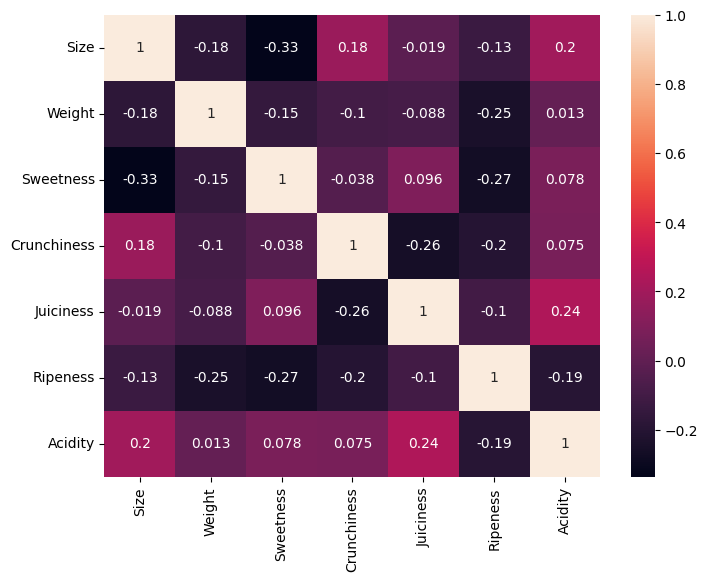

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Вычисление корреляционной матрицы
corr_matrix = df_train.corr() # Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)


In [44]:
#num_columns = df_train.select_dtypes(include=['float64', 'int64']).columns # выбираем числвоые колонки
#cat_columns = df_train.select_dtypes(include=['category']).columns # выбираем категориальные колонки

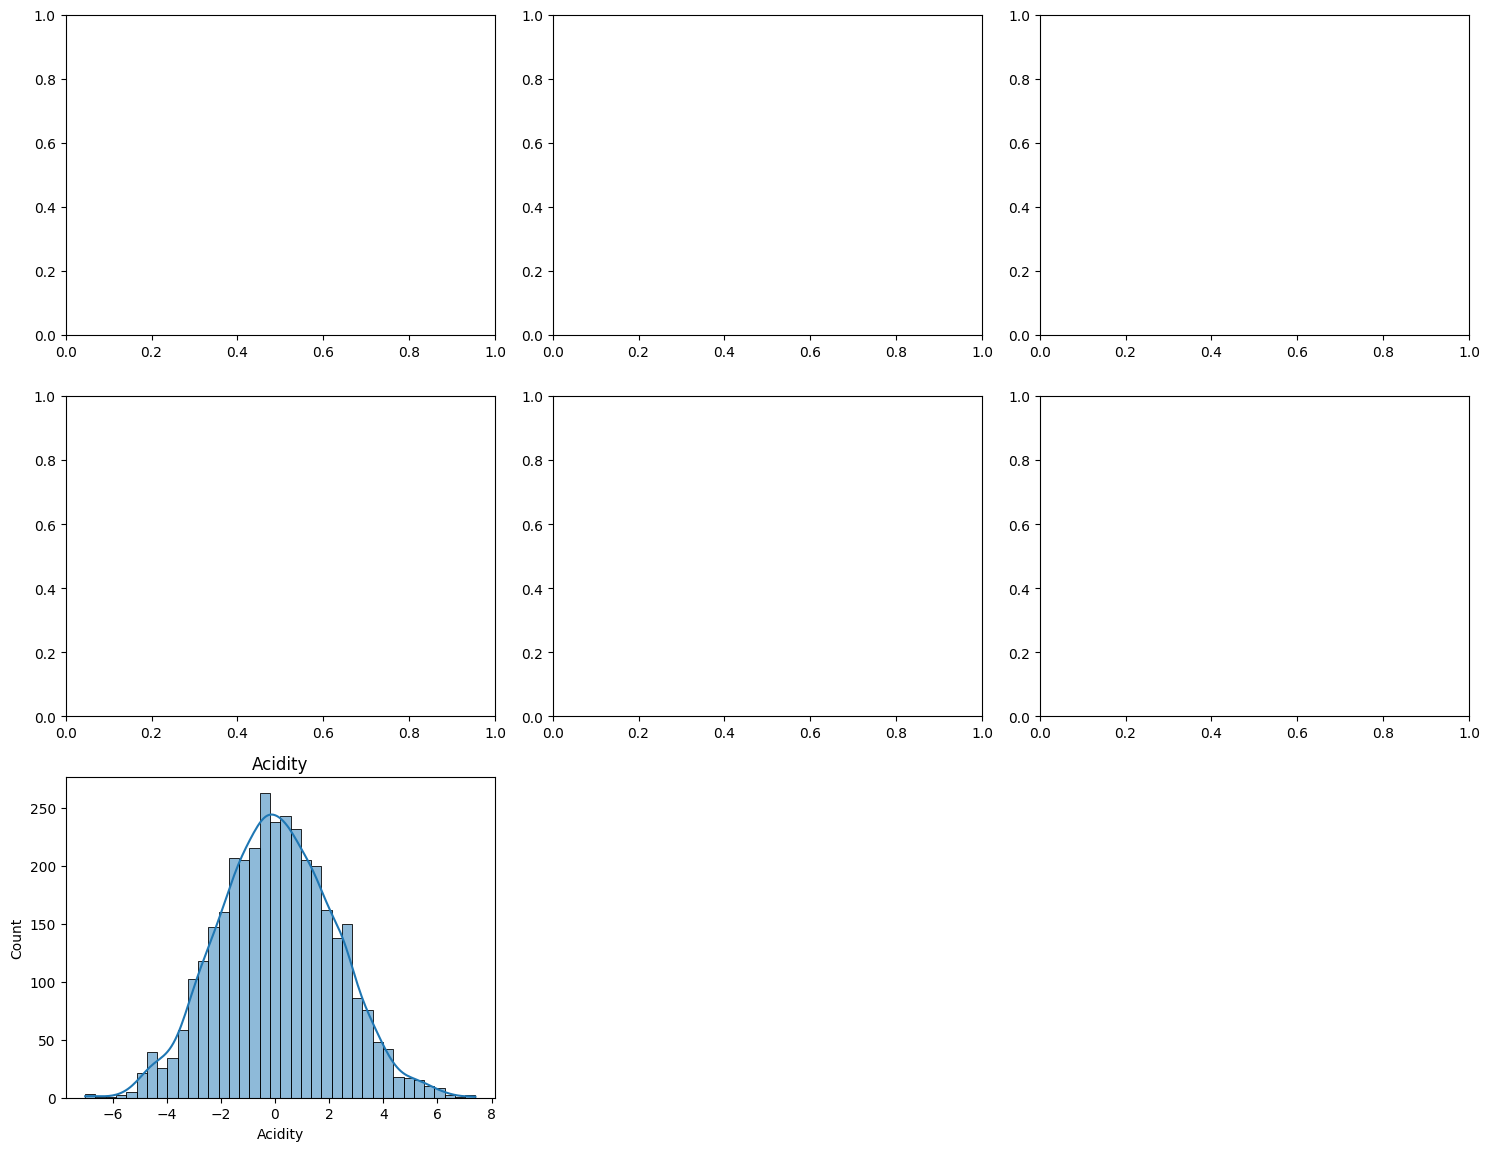

In [45]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(num_columns, 1): plt.subplot(4, 3, i)
sns.histplot(df_train[column], kde=True)
plt.title(column)
plt.tight_layout()
plt.show()

In [46]:
# 2 - закодировать значения столбца Quality, где bad - 0, good - 1

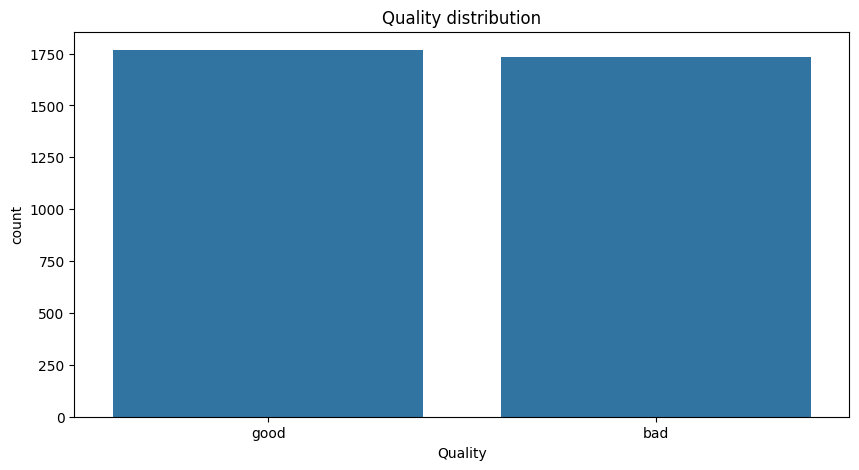

In [47]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df_train, x='Quality')
plt.title('Quality distribution')
plt.show()

In [48]:
#предобработка данных

#map для Sex
df_train['Quality']=df_train['Quality'].map({'good':1,'bad':0})


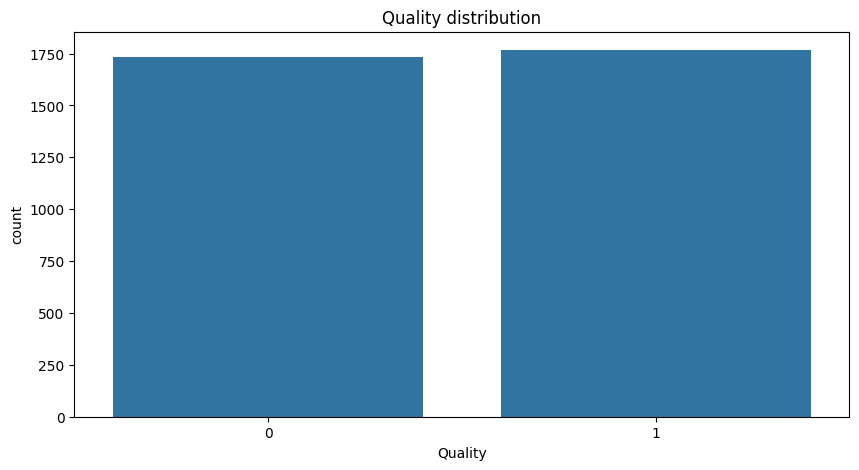

In [49]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df_train, x='Quality')
plt.title('Quality distribution')
plt.show()

In [50]:
# 3 - построить модель логистической регрессии со всеми признаками с помощью statsmodels
# какие признаки оказались значимы?
# какие признаки при их увеличении увеличивают вероятность того, что перед нами хорошее яблоко?

In [51]:
#делим на X и Y
Y = df_train['Quality']
X = df_train.drop(['Quality'],axis=1)

In [52]:
log_reg = sm.Logit(Y, add_constant(X)).fit()
print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.514139
         Iterations 6
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: Quality          Pseudo R-squared: 0.258      
Date:               2024-02-12 09:02 AIC:              3614.9759  
No. Observations:   3500             BIC:              3664.2601  
Df Model:           7                Log-Likelihood:   -1799.5    
Df Residuals:       3492             LL-Null:          -2425.8    
Converged:          1.0000           LLR p-value:      2.7967e-266
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const          0.6576    0.0661    9.9529  0.0000   0.5281   0.7871
Size           0.6432    0.0302   21.2788  0.0000

In [53]:
#создание модели с помощью scikit-learn
clf = LogisticRegression()

In [54]:
# 4 - попробуйте составить однофакторные модели с каждым признаком в отдельности
# какие признаки оказались значимы?

In [55]:
#гиперпараметры
C_values = [0.001, 0.01, 0.1, 10, 100, 1000]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [64]:
# 5 - постройте модель логистической регрессии с помощью sklearn (на любом наборе признаков)
# попробуйте с помощью кросс-валидации (метрика - точность) и перебора признаков определить оптимальные параметры для вашей модели

In [65]:
#кросс-валидация, метрика - точность
scores = cross_validate(clf, X, Y, cv=10,scoring=('accuracy'))

In [66]:
scores

{'fit_time': array([0.04106045, 0.04102468, 0.03980637, 0.04402781, 0.07872176,
        0.06404281, 0.0632031 , 0.02627087, 0.02504444, 0.02431083]),
 'score_time': array([0.00386834, 0.01055169, 0.00926948, 0.01907277, 0.00344253,
        0.01432729, 0.00897217, 0.0036335 , 0.00366783, 0.00366282]),
 'test_score': array([0.76      , 0.68857143, 0.77714286, 0.75714286, 0.72      ,
        0.73428571, 0.79714286, 0.76      , 0.76      , 0.74285714])}

In [67]:
scores['test_score'].mean().round(2)

0.75

In [68]:
#тюнинг модели - подбор наилучших параметров
for c in C_values:
  for s in solvers:
    clf = LogisticRegression(penalty='l2',C=c,solver=s,max_iter=10000)
    scores = cross_validate(clf, X, Y, cv=10,scoring=('accuracy'))
    print(f'{c},{s} - ',scores['test_score'].mean().round(2))

0.001,lbfgs -  0.74
0.001,liblinear -  0.73
0.001,newton-cg -  0.74
0.001,newton-cholesky -  0.74
0.001,sag -  0.74
0.001,saga -  0.74
0.01,lbfgs -  0.75
0.01,liblinear -  0.75
0.01,newton-cg -  0.75
0.01,newton-cholesky -  0.75
0.01,sag -  0.75
0.01,saga -  0.75
0.1,lbfgs -  0.75
0.1,liblinear -  0.75
0.1,newton-cg -  0.75
0.1,newton-cholesky -  0.75
0.1,sag -  0.75
0.1,saga -  0.75
10,lbfgs -  0.75
10,liblinear -  0.75
10,newton-cg -  0.75
10,newton-cholesky -  0.75
10,sag -  0.75
10,saga -  0.75
100,lbfgs -  0.75
100,liblinear -  0.75
100,newton-cg -  0.75
100,newton-cholesky -  0.75
100,sag -  0.75
100,saga -  0.75
1000,lbfgs -  0.75
1000,liblinear -  0.75
1000,newton-cg -  0.75
1000,newton-cholesky -  0.75
1000,sag -  0.75
1000,saga -  0.75


In [69]:
clf_final = LogisticRegression(penalty='l2',C=0.01,solver='lbfgs',max_iter=10000)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
clf_final.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=10000)

In [71]:
#коэффициенты при признаках
coefs=pd.DataFrame()
coefs['coef']=clf_final.coef_[0]
coefs['column']=X.columns
print('Свободный член:',clf_final.intercept_)
coefs

Свободный член: [0.55559933]


,coef,column
0,0.524630,Size
1,0.216968,Weight
2,0.474853,Sweetness
3,0.027061,Crunchiness
4,0.370404,Juiciness
5,-0.130905,Ripeness
6,-0.229892,Acidity


In [72]:
#предсказание
y_pred = clf_final.predict(X_test)

for i in range(10):
  print(f'Модель - {y_pred[i]},Истинная метка - {y_test.values[i]}')

Модель - 0,Истинная метка - 0
Модель - 1,Истинная метка - 1
Модель - 0,Истинная метка - 0
Модель - 1,Истинная метка - 1
Модель - 0,Истинная метка - 0
Модель - 0,Истинная метка - 1
Модель - 1,Истинная метка - 1
Модель - 0,Истинная метка - 0
Модель - 1,Истинная метка - 1
Модель - 1,Истинная метка - 1


In [73]:
y_pred_proba = clf_final.predict_proba(X_test)
#predict_proba(X_test)[:,1]
y_pred_proba[:,1]

array([0.12255988, 0.73842672, 0.03000795, 0.77010029, 0.16160446,
       0.4935932 , 0.72384814, 0.0747201 , 0.92916607, 0.59006626,
       0.59791758, 0.60290699, 0.31062409, 0.41267697, 0.57955617,
       0.92795632, 0.36885903, 0.16307303, 0.4219789 , 0.66656981,
       0.15546155, 0.09947342, 0.36951943, 0.67498724, 0.03051757,
       0.82949747, 0.72995322, 0.60545562, 0.66040811, 0.75254318,
       0.46427367, 0.1523817 , 0.27568938, 0.76673513, 0.35442694,
       0.72988736, 0.07785278, 0.08070973, 0.30491432, 0.75558417,
       0.72326706, 0.59828795, 0.08712488, 0.13899983, 0.12300899,
       0.60385061, 0.36286271, 0.51497817, 0.47614006, 0.81799484,
       0.38283777, 0.60301977, 0.55590184, 0.0534885 , 0.20071194,
       0.60829546, 0.10513044, 0.19404686, 0.70666451, 0.47520854,
       0.44258943, 0.57616655, 0.77328356, 0.06950722, 0.31183139,
       0.86708953, 0.29861208, 0.56301132, 0.18608152, 0.26483279,
       0.85844323, 0.39692892, 0.19709308, 0.85146669, 0.64675

In [ ]:
# для тестового набора данных с помощью вашей модели предскажите значение Quality
# результат прогноза преобразуйте обратно в good/bad

In [ ]:
# сохраните записку в ВашаФамилия.ipynb
# результат прогноза для тестовой выборки просылаем в формате csv,
# где лежит только один столбец result, название файла - ВашаФамилия.csv

Лучшая работа (3 балла) - выполнены все задания + лучшее значение метрики accuracy на тестовом наборе данных

Форма для отправки ответов - https://forms.gle/GZkY8CoMWE4FcPK48